##  Machine Learning 
###  Decision trees with training/testing evaluation to measure a company's bankruptcy risk

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
bankruptcy = pd.read_csv('../data/bankruptcy.csv', index_col='Company')

In [3]:
features = bankruptcy.loc[:, bankruptcy.columns != 'Bankrupt']
target = bankruptcy.Bankrupt

### Evaluation with training and testing partition

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [5]:
x_train, x_test, y_train, y_test = train_test_split(features.values,
                                                    target.values,
                                                    test_size=0.4,
                                                    stratify=target.values)

In [6]:
vals, counts = np.unique(y_train, return_counts=True)
dict(zip(vals, counts))

{'no': 15, 'yes': 15}

In [7]:
vals, counts = np.unique(y_test, return_counts=True)
dict(zip(vals, counts))

{'no': 10, 'yes': 10}

In [8]:
dTree = DecisionTreeClassifier(min_samples_leaf=4)

In [9]:
_ = dTree.fit(x_train, y_train)

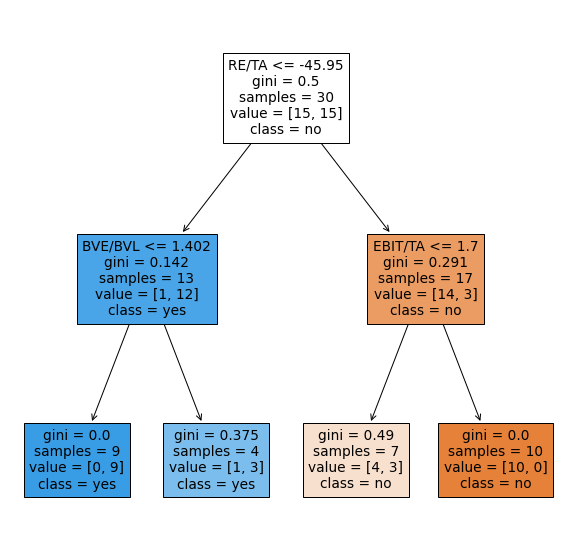

In [10]:
fig, ax = plt.subplots(figsize=(10,10))
_ = plot_tree(dTree, feature_names=features.columns,
                            class_names=dTree.classes_,
                            filled=True)

Predicción sobre los ejemplos de test

In [11]:
test_predicted = dTree.predict(x_test)

In [12]:
pd.DataFrame({'label': y_test, 
              'predicted': test_predicted})

,label,predicted
0,no,no
1,yes,yes
2,no,no
3,no,no
4,no,no
5,yes,yes
6,yes,yes
7,no,no
8,yes,yes
9,yes,yes


In [13]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [14]:
confusion_matrix(y_test, test_predicted)

array([[10,  0],
       [ 1,  9]])

In [15]:
def matriz_confusion(y_real, y_pred):
    real = pd.Series(y_real, name='Real')
    predicted = pd.Series(y_pred, name="Predicted")
    return pd.crosstab(predicted, real)
                 

In [16]:
matriz_confusion(y_test, test_predicted)

Real,no,yes
Predicted,,
no,10,1
yes,0,9


In [17]:
accuracy_score(y_test, test_predicted)

0.95